
## FINANCIAL ECONOMETRICS
MODULE 6 | LESSON 2

---

# **ERGODICITY AND VECTOR AUTOREGRESSIVE MODEL**

|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Basic Time Series  |
|**Keywords** | Ergodicity, Vector Autoregressive Model, Contemporaneous correlation, Seemingly Unrelated Regression |


---<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

*So far, we have been learning how to analyze single time series or univariate time series. Starting from this lesson, we are going to expand our analysis to two time series or bivariate time series. The theory can easily extend to multiple time series. The first multivariate time series model we are going to look into is the vector autoregressive model (VAR). Then, we will present an example of how to apply the VAR model to forecast financial asset performance. Before talking about the VAR model, we will cover a desired property we would like to have for a time series: ergodicity.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch.unitroot import ADF
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from statsmodels.tsa.api import VAR

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
# Download datasets
m6_data = pd.read_csv("M6. goog_eur_10.csv")

# Convert date variable to date format and set index
m6_data["Date2"] = pd.to_datetime(m6_data["Date"], format="%m/%d/%Y")
data_set = m6_data.loc[:,].set_index("Date2")

# Selecting GOOGLE, EURUSD, UST10Y
goog = data_set.GOOGLE
eur = data_set.EURUSD
ust10 = data_set.UST10Y

## **1. Ergodicity**

In Module 4, Lesson 1, we explained what a time series is. Let's do a quick review. Assume we have the price of Stock A for five days as follows:

**Table 1: Stock A Price for 5 Days**

| Date  | Price: Observed Data | Associated Random Variable |
| :---: | :---: | :---: |
| day 1 | $x_1$ | $X_1$ |
| day 2 | $x_2$ | $X_2$ |
| day 3 | $x_3$ | $X_3$ |
| day 4 | $x_4$ | $X_4$ |
| day 5 | $x_5$ | $X_5$ |



From table 1, we see the Stock A price data points as $\{ x_1, x_2, x_3, x_4, x_5 \}$. In time series analysis, we say these data points are one data realization from a series of random variables $\{ X_1, X_2, X_3, X_4, X_5 \}$ in five days. Given this setup, Stock A price data points can have another realization, say  $\{ x'_1, x'_2, x'_3, x'_4, x'_5 \}$, from the series of random variables over a series of equally distanced time points. We call the system of these series of random variables a **stochastic process**. AR, MA, or ARIMA models are all examples of stochastic processes. The time series data we actually obtain is just one data realization from the stochastic process. We can treat the time series data as just one sample from the stochastic process. If we do another sampling, we will get another collection of data points. In the real world, we only get one realization of data points though.

Even though we only get one data realization in the real world, we usually say the more data points we get from our sample, the better we are informed about the structure that generates these data points. This is the general idea of the Law of Large Numbers (LLN). The property of **ergodicity** is to ensure that a stochastic process can be properly established by a large number of data points under LLN. We can also say that as we get more data points, we will have more information about a stochastic process that generates the data points if this process is ergodic. 

Okay, we know how the property of ergodicity of a stochastic process can help us understand the process. However, how can we define ergodicity in order to offer the property we just described?

The intuitive definition for **ergodicity** is as follows: A stochastic process $\{ X_t \}_{t=-\infty }^\infty $ is ergodic if any two collection of random variables partitioned far apart in the sequence are essentially independent. 

Let's use an example to explain the definition. Say we pick the random variables at $t =1$ and $t=3$, which will be $X_1$ and $X_3$. Assume their correlation, $corr(X1, X3)$, is $0.6$. Their time distance is $3-1=2$. Then, we pick another pair of random variables, say at $t = 23$ and $t = 45$. Assume their correlation, $corr(X_{23}, X_{45})$, is $0.3$. Their time difference is $45-23=22$. Lets pick another pair of random variables, say at $t = 11$ and $t = 1432$. Assume their correlation, $corr(X_{11}, X_{1432})$, is $0.001$. Their time difference is $1432-11=1421$. From the above example of stochastic process X, we can see as the time difference gets larger, the correlation of two variables from X process get smaller. When this time difference gets large enough for any two random variables from process X, the correlation of the two random variables goes close to $0$. This diminishing dependence of two random variables as their time difference gets wider illustrates the concept of ergodicity. According to ergodicity, if two random variables are far apart enough, their correlation will be very low. It also means they will provide different information about the stochastic process to which they belong. Hence, we can also say the property of ergodicity property will make sure LLN will work for the stochastic process. 

If a time series $x_t$ is stationary and $\sum_{j=0}^{\infty } cov(x_t,x_{t-j}) < \infty $, then $x_t$ is ergodic for mean. It means that if we have a large enough data sample from time series $x_t$, the sample mean of the time series is a consistent estimate of the population mean of the underlying process. 


## **2. Vector Autoregressive Model (VAR)**

Vector Autoregressive Model (VAR) is a time series model that is used to forecast two or more time series. VAR model can also be used to understand the joint dynamic interaction among time series. VAR is a multiple variables version of an AR model. Let's use a VAR model to explain how it works.

Assume we have two time series $x_t$ and $y_t$ and we would like to understand how they interact with each other. With a lag 2 VAR model, we can write the model as follows:

$$ x_t = \alpha_0 + \alpha_1 x_{t-1} + \alpha_2 x_{t-2} + \beta_1 y_{t-1}+\beta_2 y_{t-2} + e_t $$

$$ y_t = \phi_0 + \phi_1 x_{t-1} + \phi x_{t-2} + \theta_1 y_{t-1} + \theta y_{t-2} + \epsilon_t $$

Where $e_t \sim \text{white noise} (0, \sigma^2_e)$ and $\epsilon_t \sim \text{white noise} (0, \sigma^2_\epsilon)$ and both $e_t$ and $\epsilon_t$ are not autocorrelated. 

There are a few key features for a VAR model.

**a. VAR model is not a simultaneous model.**

One key point to note is that the current values of $x_t$ and $y_t$ only depend on the past values of both time series. This point is important because it means that a VAR model does not require solving both equations at the same time to estimate the parameters of the model. A VAR model is not a simultaneous model. We can actually estimate each equation separately. This is the key point why the VAR model is popular because this structure makes estimating the model and forecasting very convenient. 

**b. $e_t$ and $\epsilon_t$ are contemporaneously correlated.**

$e_t$ and $\epsilon_t$ can be correlated. They can both be impacted by the factors that are not in the equation system. For example, if $x_t$ and $y_t$ are two stock prices, the outside factors like the outbreak of war or government action on financial markets can impact both $e_t$ and $\epsilon_t$ at the same time. We call $e_t$ and $\epsilon_t$ contemporaneously correlated. We also can call this equation system seemingly unrelated regression (SUR).

**c. $x_t$ and $y_t$ are stationary and ergodic.**

If $x_t$ and $y_t$ are $I(1)$, then we can take the first difference to both time series to make them stationary. A VAR model can actually use non-stationary time series directly in the model. However, the model will need to make some adjustments before estimation. We will talk more about this situation in the following lessons.

**d. Estimate Each Equation Using OLS Estimation.**

Like we mentioned in point A, each equation can be estimated separately because they are not simultaneous equations and they have identical exogenous variables. We can estimate each equation by using OLS estimation, one at a time.

In our example, we have two time series, two equations, and two lags in the equations. We call this VAR model a two-dimension VAR(2) model. Two dimension refers to the two time series in the model. VAR(2) refers to the two lags in the model. In the next section, we are going to show how to run a VAR model for financial assets. 


## **3. VAR Model Application: Google Stock Price, EUR/USD Forex Rate and U.S. 10-Year Treasury Yield**

In this section, we are going use data from Google Stock Price, EUR/USD Forex Rate, and the U.S. 10-year Treasury yield to build a VAR model. First, let's draw time plots for the three time series.


**Figure 1: Time Plots for Google Stock Price, EUR/USD Forex Rate and U.S. 10-Year Treasury Yield from 2016 to 2021**


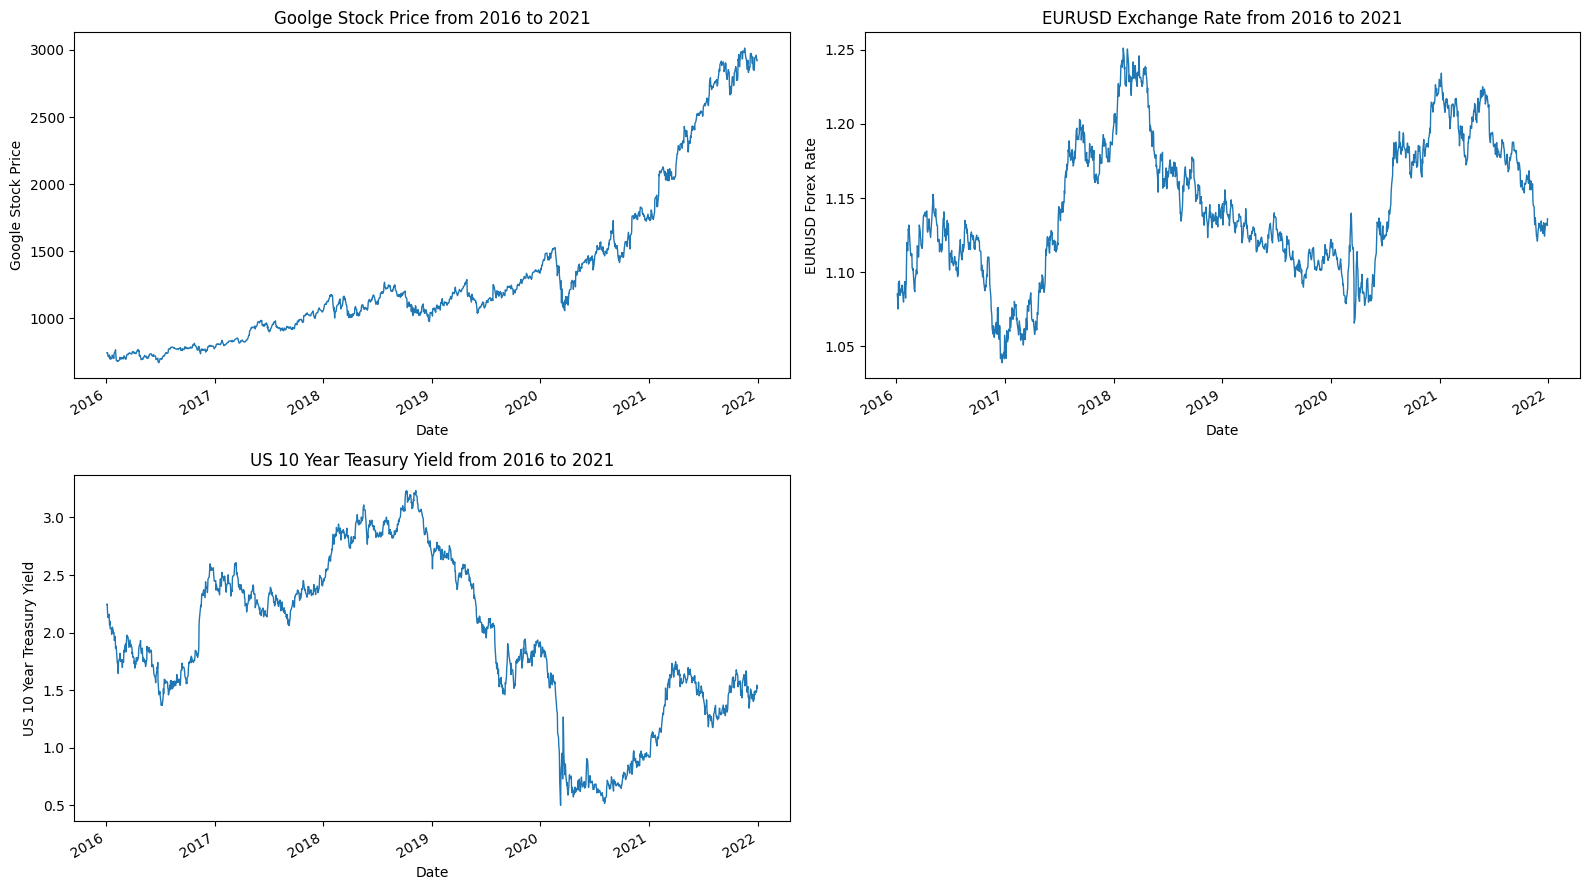

In [4]:
# Time plots for Google Stock Price, EUR/USD Forex Rate and U.S. 10-Year Treasury Yield
fig, axs = plt.subplots(2, 2)

goog.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Google Stock Price",
    title="Goolge Stock Price from 2016 to 2021",
    ax=axs[0, 0],
)

eur.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="EURUSD Forex Rate",
    title="EURUSD Exchange Rate from 2016 to 2021",
    ax=axs[0, 1],
)

ust10.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="US 10 Year Treasury Yield",
    title="US 10 Year Teasury Yield from 2016 to 2021",
    ax=axs[1, 0],
)

axs[1, 1].axis("off")
fig.tight_layout()
plt.show()

From figure 1, we can see that Google's stock price has a long-term trend and the other two assets have short trends during the period. Let's ADF test to check for their stationarity.


**Figure 2: ADF Test Results with 5% Significance Level for Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield**


In [5]:
# ADF Test Results with 5% Significance Level for GOOGLE, EURUSD, UST10Y
goog_adf = ADF(goog, trend="n", method="bic")
eur_adf = ADF(eur, trend="n", method="bic")
ust10_adf = ADF(ust10, trend="n", method="bic")

pd.DataFrame(
    {
        "Google Stock Price": (goog_adf.stat, goog_adf.critical_values["5%"]),
        "| EURUSD Forex Rate": (eur_adf.stat, eur_adf.critical_values["5%"]),
        "| US 10 Year Treasury Yield": (
            ust10_adf.stat,
            ust10_adf.critical_values["5%"],
        ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)

,Google Stock Price,| EURUSD Forex Rate,| US 10 Year Treasury Yield
ADF Test Statistic,3.04790,0.164388,-0.810331
5% Critical Value,-1.94118,-1.941180,-1.941180


From figure 2, we can see that none of the financial assets has an ADF test statistic lower than 5% critical value. Hence, we cannot reject $H_0$ hypothesis and there are unit roots in three time series. Let's take the first difference and check the differenced time series again.


**Figure 3: Time Plots for Differenced Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield from 2016 to 2021**


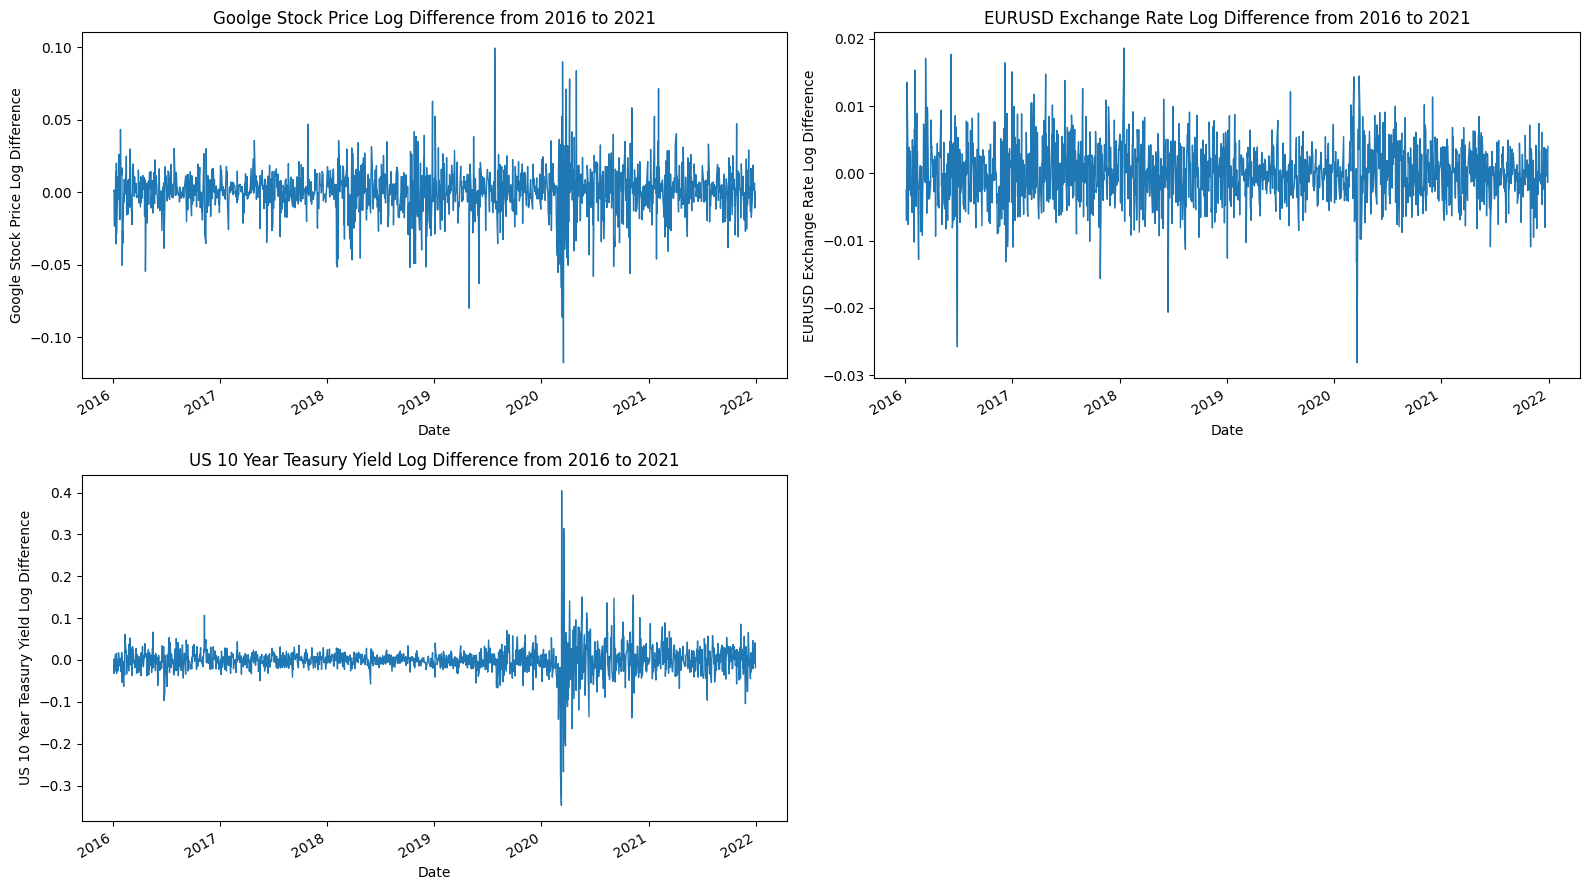

In [6]:
# Time Plots for Differenced GOOGLE, EURUSD, UST10Y
fig, axs = plt.subplots(2, 2)

lgoog = np.log(goog).diff().dropna()
lgoog.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Google Stock Price Log Difference",
    title="Goolge Stock Price Log Difference from 2016 to 2021",
    ax=axs[0, 0],
)

leur = np.log(eur).diff().dropna()
leur.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="EURUSD Exchange Rate Log Difference",
    title="EURUSD Exchange Rate Log Difference from 2016 to 2021",
    ax=axs[0, 1],
)

lust10 = np.log(ust10).diff().dropna()
lust10.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="US 10 Year Teasury Yield Log Difference",
    title="US 10 Year Teasury Yield Log Difference from 2016 to 2021",
    ax=axs[1, 0],
)

axs[1, 1].axis("off")
fig.tight_layout()
plt.show()

From figure 3, we can see that the three differenced time series are all moving around $0$ now. Let's check their ADF tests.


**Figure 4: ADF Test Results with 5% Significance Level for Differenced Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield**


In [7]:
# ADF Test Results with 5% Significance Level for Differenced GOOGLE, EURUSD, UST10Y
lgoog_adf = ADF(lgoog, trend="n", method="bic")
leur_adf = ADF(leur, trend="n", method="bic")
lust10_adf = ADF(lust10, trend="n", method="bic")

pd.DataFrame(
    {
        "Google Stock Price": (lgoog_adf.stat, lgoog_adf.critical_values["5%"]),
        "| EURUSD Forex Rate": (leur_adf.stat, leur_adf.critical_values["5%"]),
        "| US 10 Year Treasury Yield": (
            lust10_adf.stat,
            lust10_adf.critical_values["5%"],
        ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)

,Google Stock Price,| EURUSD Forex Rate,| US 10 Year Treasury Yield
ADF Test Statistic,-43.391403,-39.458187,-16.826455
5% Critical Value,-1.941180,-1.941180,-1.941181


From figure 4, we can see the ADF test statistics for three time series are all lower than the 5% critical value. Therefore, we can conclude that we can reject $H_0$ hypothesis and state that the three differenced time series do not have unit roots.

The next thing we need to do is to decide how many lags we would like to include in our VAR model for Google's stock price, EUR/USD Forex rate, and U.S. 10-year Treasury yield. The software helps us select the number of lags for VAR model using information criteria. Here is the result of selecting the optimal number of lags for the differences of three time series. 


**Figure 5: VAR Model Lag Selection for Differenced Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield**


In [8]:
# VAR Model Lag Selection for Differenced GOOGLE, EURUSD, UST10Y

# Join log time series in one DataFrame
diff_data = pd.concat([lgoog, leur, lust10], axis=1)

# Fit VAR model and run lag selection tool
model = VAR(diff_data)
x = model.select_order(maxlags=12, trend="c")
x.summary()

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-25.77,-25.76*,6.404e-12,-25.77
1,-25.80,-25.75,6.260e-12,-25.78*
2,-25.80,-25.72,6.247e-12,-25.77
3,-25.80,-25.70,6.228e-12,-25.76
4,-25.81,-25.67,6.197e-12,-25.76
5,-25.81,-25.64,6.151e-12,-25.75
6,-25.82,-25.62,6.112e-12,-25.75
7,-25.86,-25.63,5.858e-12,-25.78
8,-25.87,-25.60,5.825e-12,-25.77
9,-25.87*,-25.57,5.804e-12*,-25.76


From figure 5, we can see different information criteria gives different results. One lag and nine lags are the two options from the results. We can run one set of a VAR model with one lag and one set of a VAR model with nine lags and then compare the model results and select the optimal one. In this case, we are going to select only one lag for the purpose of demonstration.

Now let's run the VAR(1) model for the difference of Google's stock price, EUR/USD Forex rate, and U.S. 10-year Treasury yield. We will include an intercept in this model.


**Figure 6: VAR(1) Model Result for Differenced Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield**


In [9]:
# VAR(1) model for Differenced GOOGLE, EURUSD, UST10Y
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    maxlags=None,
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic=None,  # ic=None => automatic lag selection
    method="ols",
    trend="c",
    verbose=True,
)
diff_mod_var.summary()

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 18, Sep, 2025
Time:                     17:22:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -25.7532
Nobs:                     1503.00    HQIC:                  -25.7799
Log likelihood:           12999.5    FPE:                6.26733e-12
AIC:                     -25.7957    Det(Omega_mle):     6.21756e-12
--------------------------------------------------------------------
Results for equation GOOGLE
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000992         0.000420            2.362           0.018
L1.GOOGLE        -0.098637         0.026278           -3.754           0.000
L1.EURUSD         0.005368         0.094335            0.057           0.95

In [10]:
# Get the lag order that was selected
lag_order = diff_mod_var.k_ar
print(lag_order)

1


Figure 6 lists out the coefficient estimates for three equations. For the Google equation, Google lag 1 and 10-year treasury yield lag 1 are significant. For EUR/USD Forex rate, 10-year Treasury yield lag 1 is significant. For 10-year Treasury yield, Google lag 1 is significant. Now, let's check out the forecast plots from the model. 


**Figure 7: VAR Model Forecast of the Difference of the Differenced Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield**


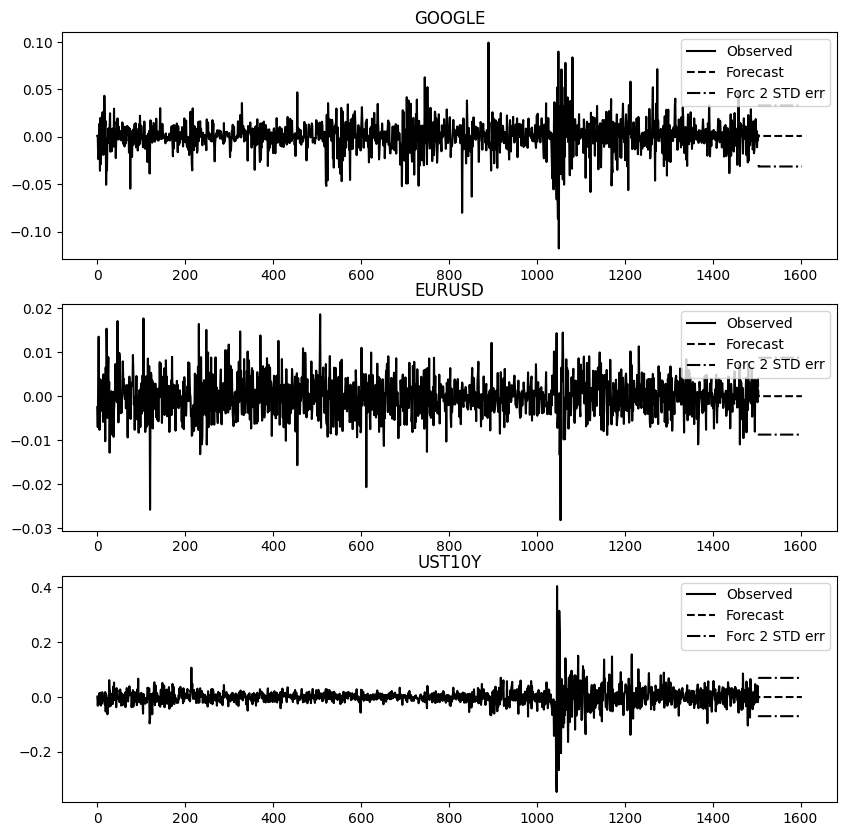

In [11]:
# VAR Model Forecast of the Difference of the Differenced GOOGLE, EURUSD, UST10Y
diff_mod_var.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.show()

**Figure 8: VAR Model Forecast of Level of Google Stock Price, EUR/USD Forex Rate, and U.S. 10-Year Treasury Yield**


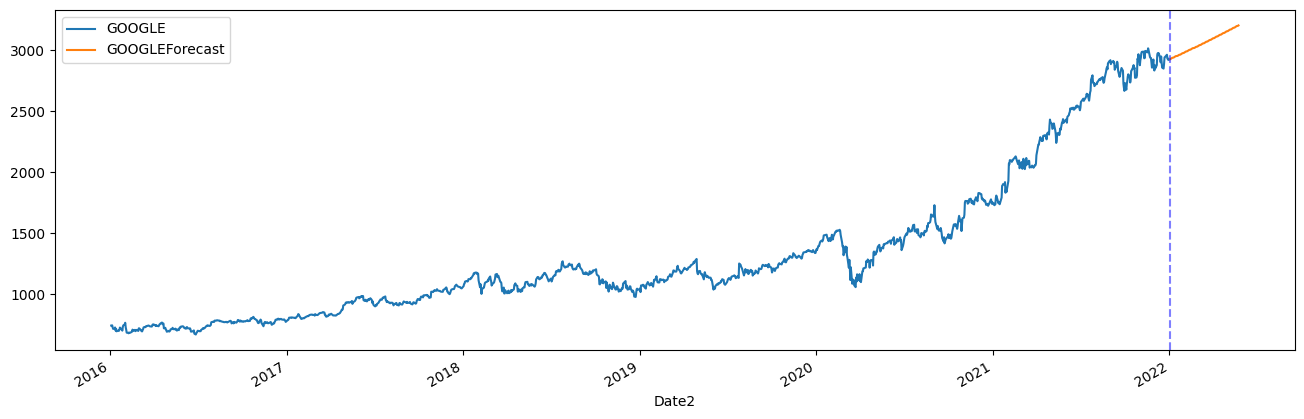

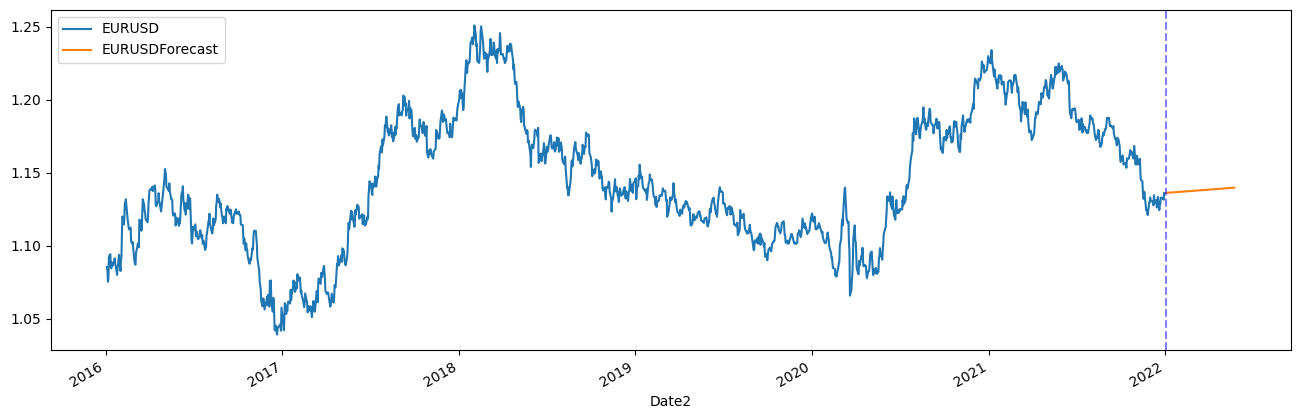

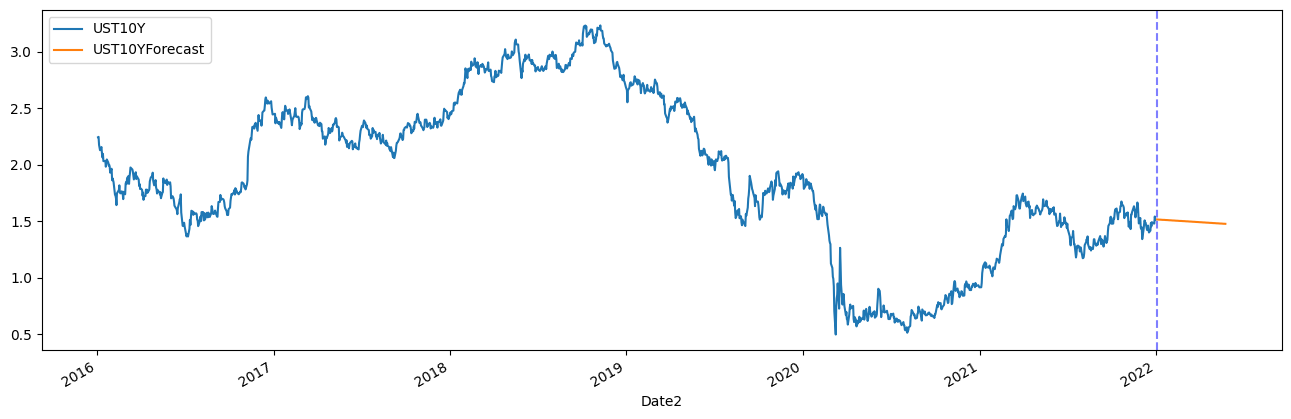

In [12]:
# VAR Model Forecast of Level of GOOGLE, EURUSD, UST10Y

# get 100 step prediction values for differenced data
# drop NA values at start
diff_data_val = diff_data.values[diff_mod_var.k_ar :]  # noQA E203
pred = diff_mod_var.forecast(y=diff_data_val, steps=100)
pd.DataFrame(pred)

# extend index with 100 more business dates per USFederalHolidayCalendar
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
idx = pd.date_range("2022-01-03", periods=100, freq=us_bd)
df_forecast = pd.DataFrame(
    data=pred, index=idx, columns=["GOOGLE1d", "EURUSD1d", "UST10Y1d"]
)

# Get the last log values
last_log_goog = np.log(data_set["GOOGLE"].iloc[-1])
last_log_eur = np.log(data_set["EURUSD"].iloc[-1])  
last_log_ust10 = np.log(data_set["UST10Y"].iloc[-1])

# Convert log-differences to log-levels by cumulative sum
df_forecast["GOOGLE_log_level"] = last_log_goog + df_forecast["GOOGLE1d"].cumsum()
df_forecast["EURUSD_log_level"] = last_log_eur + df_forecast["EURUSD1d"].cumsum()
df_forecast["UST10Y_log_level"] = last_log_ust10 + df_forecast["UST10Y1d"].cumsum()

# Convert log-levels back to original levels using exponential
df_forecast["GOOGLEForecast"] = np.exp(df_forecast["GOOGLE_log_level"])
df_forecast["EURUSDForecast"] = np.exp(df_forecast["EURUSD_log_level"])
df_forecast["UST10YForecast"] = np.exp(df_forecast["UST10Y_log_level"])


# plot initial data with forecasted values for each of GOOGLE, EURUSD, UST10Y
data_set["GOOGLE"].plot(figsize=(16, 5), legend=True)
df_forecast["GOOGLEForecast"].plot(legend=True)
plt.axvline(x="2022-01-03", color="b", alpha=0.5, linestyle="--")
plt.show()

data_set["EURUSD"].plot(figsize=(16, 5), legend=True)
df_forecast["EURUSDForecast"].plot(legend=True)
plt.axvline(x="2022-01-03", color="b", alpha=0.5, linestyle="--")
plt.show()

data_set["UST10Y"].plot(figsize=(16, 5), legend=True)
df_forecast["UST10YForecast"].plot(legend=True)
plt.axvline(x="2022-01-03", color="b", alpha=0.5, linestyle="--")
plt.show()

In figure 7, we can see the forecast plots for differenced time series. The forecast for the three time series stays flat. In figure 8, we converted the difference forecast to level forecast. Google stock seems to stay flat in the level forecast. EUR/USD forecast is slightly up and the U.S. 10-year Treasury yield is slightly up.


## **4. Conclusion**

In this lesson, we started by introducing the concept of ergodicity. Ergodicity is a time series property, which states that the values of a time series move around the mean of the process and as the number of data points increase, the more likely that these data points will cover all the possible values of the distribution of the process. We provided a counterexample to demonstrate the idea of ergodicity. We then gave an intuitive definition of ergodicity. We finished this topic by briefly discussing its importance for time series analysis.

We then moved on to the vector autoregressive (VAR) model. We went through the definition and properties of a VAR model. We concluded the lesson with a VAR model example for Google stock price, EUR/USD Forex rate, and U.S. 10-year Treasury yield. In the next lesson, we will continue our multivariate time series analysis.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
